In [55]:
import pandas as pd
data = pd.read_csv("songs.csv", encoding='latin-1',engine='python')
# Preview the first & last 5 lines of the loaded data
data

,id,title,artist,top genre,year,energy,danceability,liveness,acousticness,speechiness,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,89,67,8,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,93,75,52,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,84,76,29,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,92,70,8,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,84,64,9,2,4,78
...,...,...,...,...,...,...,...,...,...,...,...
598,599,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,66,61,20,1,3,75
599,600,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,79,75,7,21,12,75
600,601,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,76,53,9,7,34,70
601,602,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,79,60,42,1,7,69


In [56]:
data.describe()

,id,year,energy,danceability,liveness,acousticness,speechiness,pop
count,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000
mean,302.000000,2014.592040,70.504146,64.379768,17.774461,14.326700,8.358209,66.520730
std,174.215384,2.607057,16.310664,13.378718,13.102543,20.766165,7.483162,14.517746
min,1.000000,2010.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,151.500000,2013.000000,61.000000,57.000000,9.000000,2.000000,4.000000,60.000000
50%,302.000000,2015.000000,74.000000,66.000000,12.000000,6.000000,5.000000,69.000000
75%,452.500000,2017.000000,82.000000,73.000000,24.000000,17.000000,9.000000,76.000000
max,603.000000,2019.000000,98.000000,97.000000,74.000000,99.000000,48.000000,99.000000


array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'energy'}>],
       [<Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'acousticness'}>],
       [<Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'pop'}>, <Axes: >]], dtype=object)

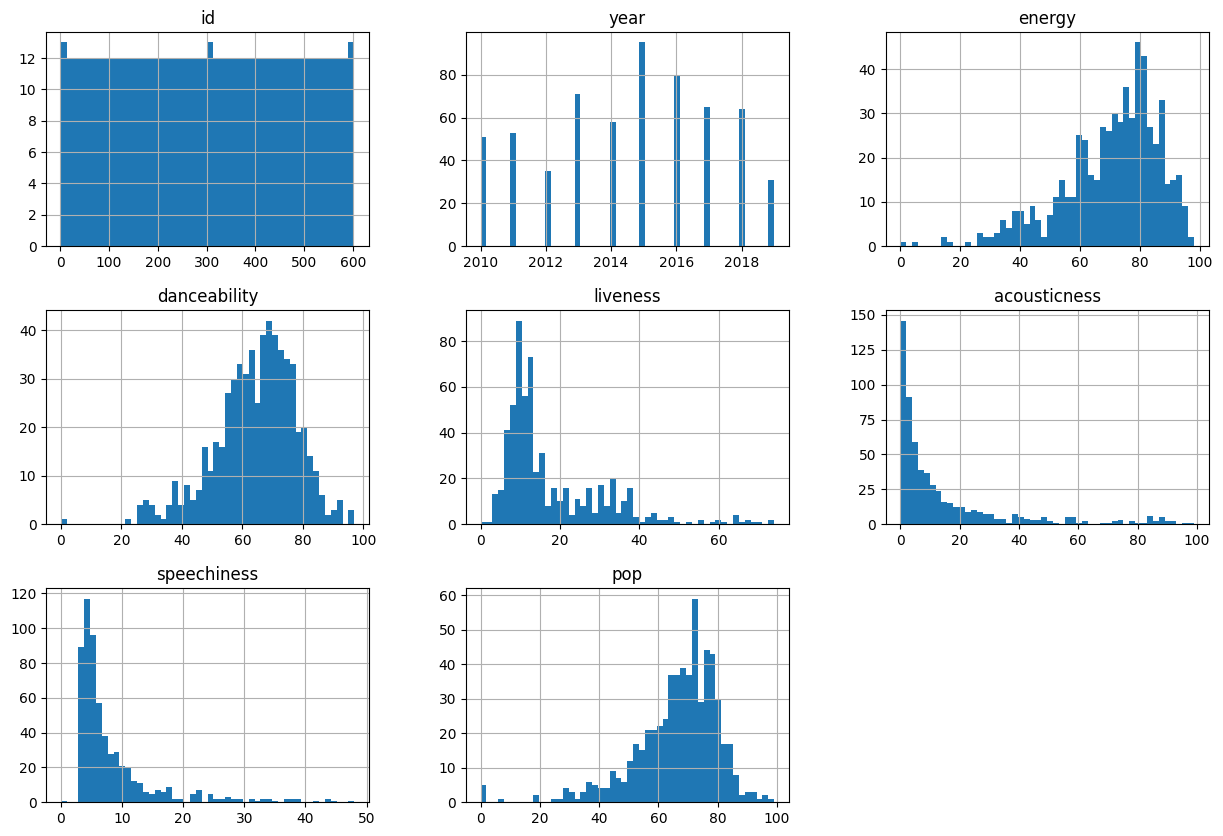

In [57]:
from matplotlib import pyplot as plt
data.hist(bins=50,figsize=(15,10))

In [58]:
# remove song names, artist and id before clustering
data_features = data.copy()
data_features = data_features.drop(['title','artist','id','year','top genre'],axis=1)
data_features

,energy,danceability,liveness,acousticness,speechiness,pop
0,89,67,8,19,4,83
1,93,75,52,24,23,82
2,84,76,29,10,14,80
3,92,70,8,0,4,79
4,84,64,9,2,4,78
...,...,...,...,...,...,...
598,66,61,20,1,3,75
599,79,75,7,21,12,75
600,76,53,9,7,34,70
601,79,60,42,1,7,69


In [59]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k, n_init='auto')
    km = km.fit(data_features)
    Sum_of_squared_distances.append(km.inertia_)

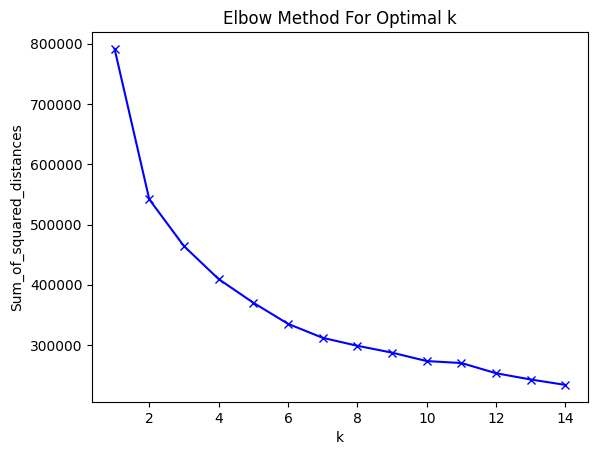

In [60]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [61]:
kmeans = KMeans(n_clusters=6, n_init='auto')
kmeans.fit(data_features)

KMeans(n_clusters=6)

In [62]:
# PCA to reduce our data to 2 dimensions for visualisation
from sklearn.decomposition import PCA
y_kmeans = kmeans.predict(data_features)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_features)


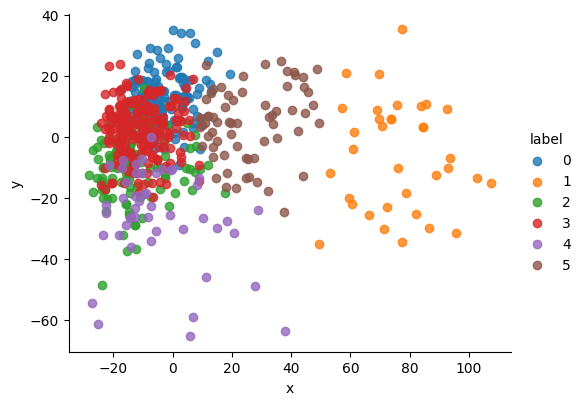

In [63]:
import seaborn as sns
pc = pd.DataFrame(principal_components)
pc['label'] = y_kmeans
pc.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=pc, x='x', y='y', hue='label',
                   fit_reg=False, legend=True, facet_kws={'legend_out': True})
cluster.fig.set_size_inches(6, 4)

In [64]:
from sklearn.manifold import TSNE #T-Distributed Stochastic Neighbor Embedding
#T-SNE with two dimensions
tsne = TSNE(n_components=2, perplexity=50)

tsne_components = tsne.fit_transform(data_features)

/usr/local/lib/python3.11/dist-packages/seaborn/regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


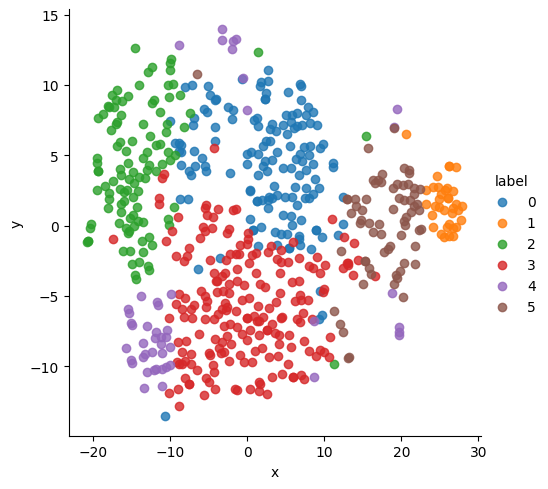

In [65]:
ts = pd.DataFrame(tsne_components)
ts['label'] = y_kmeans
ts.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=ts, x='x', y='y', hue='label', fit_reg=False, legend=True, legend_out=True)

In [66]:
pca.explained_variance_ratio_

array([0.43798608, 0.17454666])

In [67]:
# Dump components relations with features:
print (pd.DataFrame(pca.components_,columns=data_features.columns,index = ['PC-1','PC-2']))

        energy  danceability  liveness  acousticness  speechiness       pop
PC-1 -0.538315     -0.183234 -0.106366      0.814941    -0.015063  0.031170
PC-2 -0.150331      0.408807 -0.324991     -0.082877    -0.066276  0.832704


In [68]:
data['label'] = y_kmeans

# shuffle dataset
data = data.sample(frac=1) #frac=1 samples 100% of the data
data['label'].value_counts()

,count
label,
3,200
0,145
2,108
5,67
4,48
1,35


In [69]:
data[data['label'] == 0].tail(10) #returns the last N rows of filtered DataFrame

,id,title,artist,top genre,year,energy,danceability,liveness,acousticness,speechiness,pop,label
294,295,Rather Be (feat. Jess Glynne),Clean Bandit,dance pop,2015,59,80,19,16,4,73,0
489,490,Slow Hands,Niall Horan,dance pop,2017,42,74,6,1,5,64,0
518,519,Attention,Charlie Puth,dance pop,2018,61,78,13,11,5,83,0
492,493,Reality (feat. Janieck Devy) - Radio Edit,Lost Frequencies,belgian edm,2017,64,73,8,2,4,59,0
169,170,Thrift Shop (feat. Wanz),Macklemore & Ryan Lewis,dance pop,2013,53,78,5,6,29,69,0
66,67,Party Rock Anthem,LMFAO,dance pop,2011,74,75,27,2,16,72,0
502,503,Remember I Told You,Nick Jonas,dance pop,2017,53,68,4,14,28,53,0
222,223,Pompeii,Bastille,metropopolis,2014,72,68,27,8,4,73,0
173,174,#thatPOWER,will.i.am,dance pop,2013,61,80,7,0,6,68,0
549,550,End Game,Taylor Swift,pop,2018,59,65,11,1,6,70,0


In [70]:
data['top genre'][data['label'] == 0].value_counts()

,count
top genre,
dance pop,81
pop,21
canadian pop,7
electropop,6
barbadian pop,3
canadian contemporary r&b,3
belgian edm,2
hip hop,2
canadian hip hop,2


In [71]:
data[data['label'] == 1].tail(10)

,id,title,artist,top genre,year,energy,danceability,liveness,acousticness,speechiness,pop,label
473,474,All I Ask,Adele,british soul,2017,28,59,15,88,3,71,1
422,423,Wish That You Were Here - From Miss Peregrine...,Florence + The Machine,art pop,2016,57,37,13,72,3,57,1
431,432,Start,John Legend,neo mellow,2016,4,52,9,99,4,47,1
436,437,Beautiful Birds (feat. Birdy),Passenger,folk-pop,2016,17,39,11,91,3,36,1
559,560,Walk On Water (feat. Beyoncé),Eminem,detroit hip hop,2018,44,48,64,81,24,65,1
528,529,Perfect Duet (Ed Sheeran & Beyoncé),Ed Sheeran,pop,2018,30,59,12,78,3,78,1
330,331,Mark My Words,Justin Bieber,canadian pop,2015,26,38,17,88,3,63,1
359,360,Run Run Run,Kelly Clarkson,dance pop,2015,37,28,11,45,4,36,1
249,250,Say Something,A Great Big World,neo mellow,2014,15,45,9,87,3,61,1
192,193,Atlas - From The Hunger Games: Catching Fire...,Coldplay,permanent wave,2013,45,28,11,63,3,55,1


In [72]:
data['top genre'][data['label'] == 0].value_counts()

,count
top genre,
dance pop,81
pop,21
canadian pop,7
electropop,6
barbadian pop,3
canadian contemporary r&b,3
belgian edm,2
hip hop,2
canadian hip hop,2


In [73]:
data[data['label'] == 2].tail(10)

,id,title,artist,top genre,year,energy,danceability,liveness,acousticness,speechiness,pop,label
405,406,Perfect Illusion,Lady Gaga,dance pop,2016,86,61,36,0,4,67,2
68,69,Price Tag,Jessie J,australian pop,2011,83,64,27,3,18,72,2
82,83,Judas,Lady Gaga,dance pop,2011,93,66,27,0,7,63,2
25,26,Animal,Neon Trees,indie pop,2010,83,48,38,0,4,65,2
483,484,Cut To The Feeling,Carly Rae Jepsen,canadian pop,2017,91,71,30,1,6,69,2
316,317,I Lived,OneRepublic,dance pop,2015,85,59,27,7,4,67,2
134,135,Don't Stop the Party (feat. TJR),Pitbull,dance pop,2012,96,72,38,1,9,59,2
494,495,Touch (feat. Kid Ink),Little Mix,dance pop,2017,75,64,49,4,11,59,2
495,496,We Don't Talk Anymore - DROELOE Remix,Charlie Puth,dance pop,2017,82,70,45,49,22,59,2
303,304,Jealous - Remix,Nick Jonas,dance pop,2015,71,68,44,1,8,70,2


In [74]:
data['top genre'][data['label'] == 2].value_counts()

,count
top genre,
dance pop,66
pop,8
canadian pop,6
australian pop,3
boy band,3
atl hip hop,3
barbadian pop,3
electropop,2
indie pop,2


In [75]:
data[data['label'] == 3].tail(10)

,id,title,artist,top genre,year,energy,danceability,liveness,acousticness,speechiness,pop,label
553,554,Want To,Dua Lipa,dance pop,2018,69,57,6,8,12,67,3
406,407,PILLOWTALK,ZAYN,dance pop,2016,70,59,9,10,5,66,3
149,150,Impossible,James Arthur,pop,2013,70,38,11,14,9,77,3
46,47,Written in the Stars (feat. Eric Turner),Tinie Tempah,dance pop,2010,95,64,18,6,7,52,3
106,107,Paradise,Coldplay,permanent wave,2012,59,45,8,5,3,79,3
312,313,I Want You To Know,Zedd,complextro,2015,85,58,14,1,6,68,3
84,85,Please Don't Go,Mike Posner,dance pop,2011,88,70,13,0,3,63,3
287,288,Love Me Harder,Ariana Grande,dance pop,2015,71,47,8,1,3,76,3
321,322,BO$$,Fifth Harmony,dance pop,2015,87,81,5,1,11,66,3
421,422,I Know What You Did Last Summer,Shawn Mendes,canadian pop,2016,77,68,16,11,10,57,3


In [76]:
data['top genre'][data['label'] == 3].value_counts()

,count
top genre,
dance pop,107
pop,14
canadian pop,13
boy band,8
big room,6
barbadian pop,6
australian dance,5
complextro,4
neo mellow,3


In [77]:
data[data['label'] == 4].tail(10)

,id,title,artist,top genre,year,energy,danceability,liveness,acousticness,speechiness,pop,label
441,442,Behind Your Back,Nelly Furtado,canadian latin,2016,47,80,7,25,4,18,4
358,359,Spark The Fire,Gwen Stefani,dance pop,2015,80,88,20,8,6,39,4
440,441,Picky - Remix,Joey Montana,latin,2016,81,70,37,9,7,29,4
355,356,Sparks,Hilary Duff,dance pop,2015,88,85,10,4,6,44,4
138,139,Blow Me (One Last Kiss),P!nk,dance pop,2012,92,60,25,0,4,0,4
205,206,Right Now - Dyro Radio Edit,Rihanna,barbadian pop,2013,74,53,24,0,4,42,4
506,507,Kissing Strangers - Remix,DNCE,dance pop,2017,77,76,8,8,5,43,4
432,433,Pep Rally,Missy Elliott,dance pop,2016,75,83,20,22,12,47,4
207,208,Foolish Games,Jewel,alaska indie,2013,34,51,12,23,3,36,4
208,209,Outta Nowhere (feat. Danny Mercer),Pitbull,dance pop,2013,84,71,21,16,3,35,4


In [78]:
data['top genre'][data['label'] == 4].value_counts()

,count
top genre,
dance pop,36
pop,2
permanent wave,1
hip pop,1
british soul,1
big room,1
hollywood,1
atl hip hop,1
canadian latin,1


In [79]:
data[data['label'] == 5].tail(10)

,id,title,artist,top genre,year,energy,danceability,liveness,acousticness,speechiness,pop,label
522,523,Silence,Marshmello,brostep,2018,76,52,17,26,9,82,5
232,233,Gorilla,Bruno Mars,pop,2014,54,72,10,45,4,68,5
141,142,Story of My Life,One Direction,boy band,2013,66,60,12,23,5,81,5
542,543,Chun-Li,Nicki Minaj,dance pop,2018,73,69,11,28,37,73,5
444,445,Closer,The Chainsmokers,electropop,2017,52,75,11,41,3,86,5
392,393,Close,Nick Jonas,dance pop,2016,62,65,14,25,8,72,5
302,303,Sing,Ed Sheeran,pop,2015,67,82,6,30,5,71,5
269,270,I'm Not The Only One,Sam Smith,pop,2015,49,68,8,53,4,84,5
592,593,Girls Like You (feat. Cardi B),Maroon 5,pop,2019,54,85,13,57,5,81,5
11,12,Marry You,Bruno Mars,pop,2010,83,62,10,33,4,73,5


In [80]:
data['top genre'][data['label'] == 5].value_counts()

,count
top genre,
dance pop,29
pop,11
canadian pop,3
canadian contemporary r&b,3
complextro,2
edm,2
british soul,2
art pop,2
electropop,2


In [81]:
data[data['label']==0].mean(numeric_only=True)

,0
id,351.979310
year,2015.420690
energy,62.648276
danceability,74.406897
liveness,14.131034
acousticness,5.834483
speechiness,7.889655
pop,72.648276
label,0.000000


In [82]:
data[data['label']==1].mean(numeric_only=True)

,0
id,324.542857
year,2014.885714
energy,34.542857
danceability,48.057143
liveness,14.371429
acousticness,79.857143
speechiness,6.485714
pop,65.657143
label,1.000000


In [83]:
data[data['label']==2].mean(numeric_only=True)

,0
id,239.879630
year,2013.629630
energy,80.203704
danceability,62.074074
liveness,39.379630
acousticness,7.277778
speechiness,10.601852
pop,65.398148
label,2.000000


In [84]:
data[data['label']==3].mean(numeric_only=True)

,0
id,280.695
year,2014.295
energy,80.370
danceability,61.825
liveness,11.490
acousticness,6.210
speechiness,7.860
pop,68.980
label,3.000


In [85]:
data[data['label']==4].mean(numeric_only=True)

,0
id,299.770833
year,2014.145833
energy,71.375000
danceability,67.041667
liveness,15.979167
acousticness,10.333333
speechiness,9.437500
pop,33.333333
label,4.000000


In [86]:
data[data['label']==5].mean(numeric_only=True)

,0
id,347.388060
year,2015.402985
energy,60.582090
danceability,60.641791
liveness,12.656716
acousticness,36.925373
speechiness,7.447761
pop,71.955224
label,5.000000


array([[<Axes: title={'center': 'id'}>, <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'energy'}>],
       [<Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'acousticness'}>],
       [<Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'pop'}>,
        <Axes: title={'center': 'label'}>]], dtype=object)

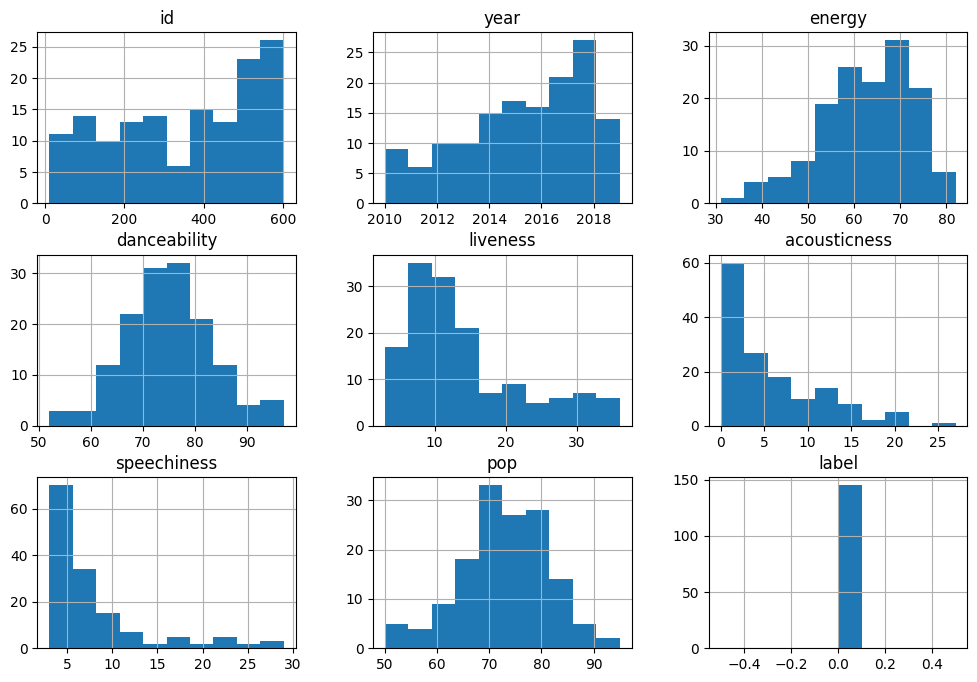

In [87]:
data[data['label']==0].hist(figsize=(12,8))

In [88]:
input1 = "love me"  #input("Enter song1: ")
input2 = "baby"     #input("Enter song2: ")
input3 = "like it"  #input("Enter song3: ")

In [89]:
# Function to find the cluster of a song
def get_song_cluster(song_title, dataframe, kmeans_model, feature_data):
    song_row = dataframe[dataframe['title'].str.contains(song_title, case=False, na=False)]
    if not song_row.empty:
        # Use the index of the original dataframe to select the corresponding feature row
        song_features = feature_data.loc[song_row.index]
        cluster = kmeans_model.predict(song_features)
        return cluster[0]
    return None

# Get clusters for input songs
input_songs = [input1, input2, input3]
input_clusters = []
for song_title in input_songs:
    cluster = get_song_cluster(song_title, data, kmeans, data_features)
    if cluster is not None:
        input_clusters.append(cluster)
        print(f"'{song_title}' is in cluster {cluster}")
    else:
        print(f"'{song_title}' not found in the dataset.")

# Recommend songs from the identified clusters
recommended_songs = pd.DataFrame()
if input_clusters:
    # Get unique clusters from input songs
    unique_clusters = list(set(input_clusters))
    print(f"\nRecommending songs from cluster(s): {unique_clusters}")
    for cluster_label in unique_clusters:
        cluster_songs = data[data['label'] == cluster_label]
        # Exclude the input songs from the recommendations
        recommended_songs = pd.concat([recommended_songs, cluster_songs[~cluster_songs['title'].str.contains('|'.join(input_songs), case=False, na=False)]])

# Display recommended songs
if not recommended_songs.empty:
    print("\nRecommended Songs:")
    # Display a random sample of recommended songs with selected columns
    display(recommended_songs.sample(min(10, len(recommended_songs)))[['title', 'artist', 'top genre', 'year']])
else:
    print("\nNo recommendations found for the given songs.")

'love me' is in cluster 4
'baby' is in cluster 0
'like it' is in cluster 2

Recommending songs from cluster(s): [np.int32(0), np.int32(2), np.int32(4)]

Recommended Songs:


,title,artist,top genre,year
109,I Knew You Were Trouble.,Taylor Swift,pop,2012
66,Party Rock Anthem,LMFAO,dance pop,2011
419,Desire,Years & Years,dance pop,2016
494,Touch (feat. Kid Ink),Little Mix,dance pop,2017
567,Supplies,Justin Timberlake,dance pop,2018
328,Booty,Jennifer Lopez,dance pop,2015
190,Live It Up,Jennifer Lopez,dance pop,2013
410,Body Say,Demi Lovato,dance pop,2016
56,Run the World (Girls),Beyoncé,dance pop,2011
123,Boyfriend,Justin Bieber,canadian pop,2012
